In [1]:
#####importing the necessary libraries
#To make the plots inline otherwise it will make seperate figure
%matplotlib inline
#for high resolution plot outputs
%config InlineBackend.figure_format = 'retina'

import numpy as np


#contains the function which evaluate random number with modified poisson distribution
import SubSup_Poisson as SSP


####plottinng library and setting
import pylab as pl
import matplotlib
matplotlib.rcParams.update({'font.size': 18, 'font.family': 'Ariel'})
import matplotlib.ticker as ticker

import setcmaps as scmap
cmaps=['coolwarm','rainbow']

### LOad all the data files needed
###DATA Directory###
#data_dir=os.environ['DATDIR']

paper_data_dir='data/'
paper_plot_dir='plots/'

# This example shows how to use this library to generate random numbers 

Note that Ap is tha parameter which controls the nature of sub-sup Poisson

Ap=1 : Possion random numbers

AP>1 : Super-Poission

AP<1 : Sub-Poission

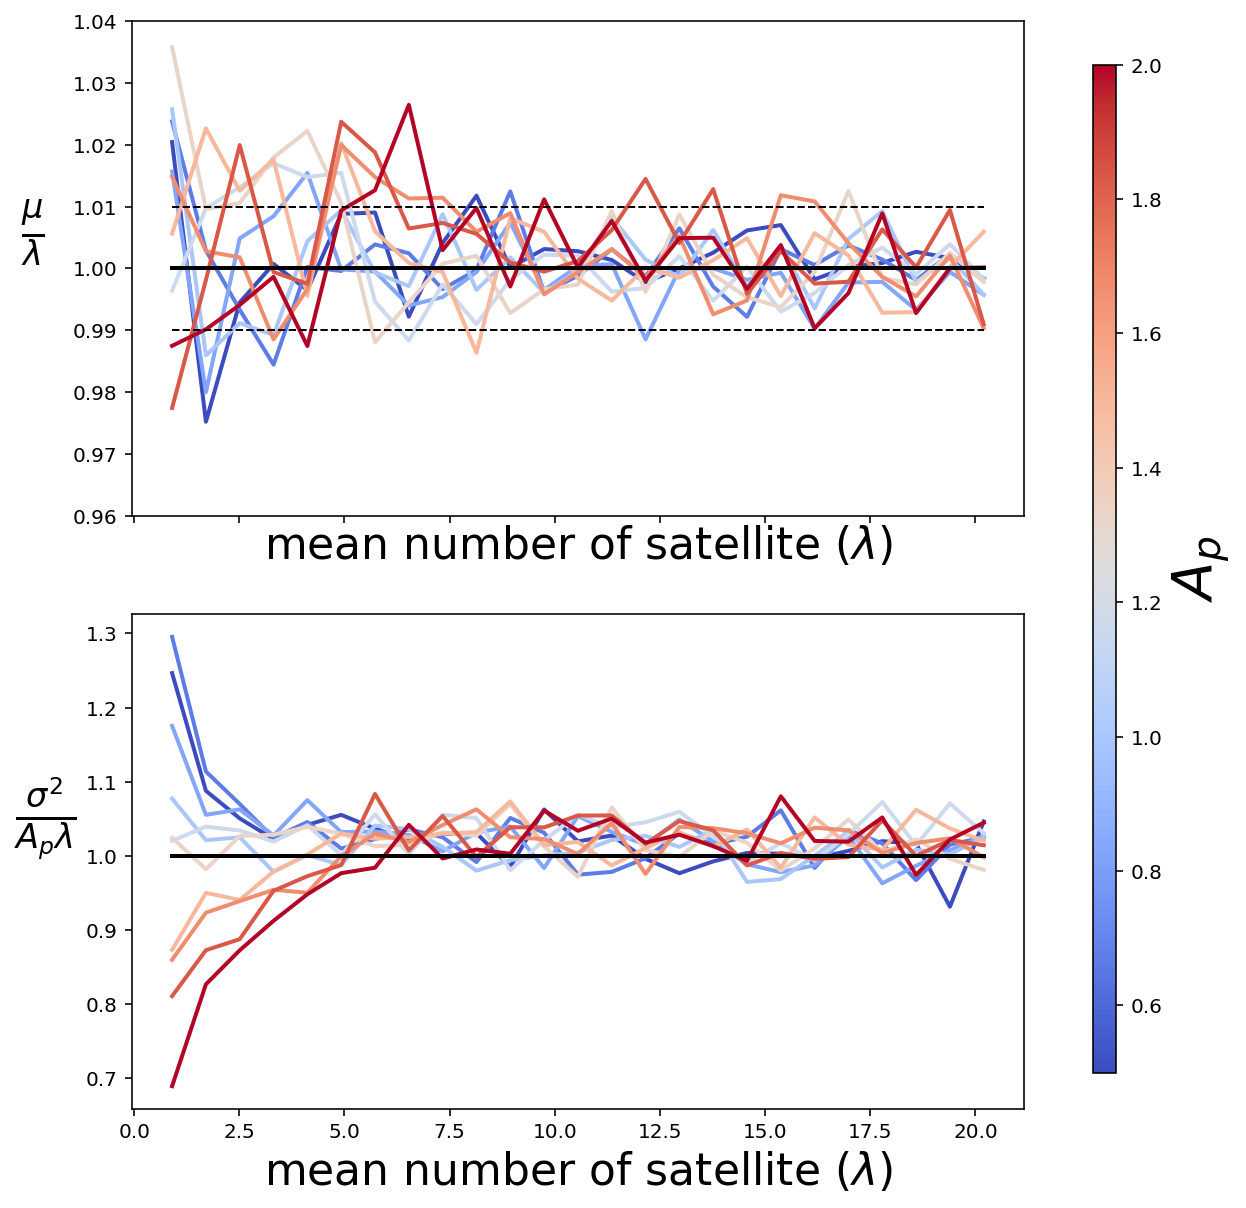

In [6]:
#meanSat=np.random.randint(20,size=1000000)
meanSat=20.0*np.random.random(size=100000)+0.5
nlam=25

#print(lam,np.sum(meanSat==lam))
lam_min=meanSat.min()
lam_max=meanSat.max()+0.1
lam_ed=np.linspace(lam_min,lam_max,nlam+1)
lam_mid=0.5*(lam_ed[1:]+lam_ed[:-1])

#Do it in iteration
ncbin=10
Ap_arr=np.linspace(0.5,2.0,ncbin)
#Ap_arr=np.array([0.5,0.8,1.0,1.5,2.0])
#lam_arr=np.array([1.5,2,3,4,5,6,])#8,10,15,20,25,40])
#lam_arr=np.array([20,25,35,40])

nAp=Ap_arr.size
mu_dist=np.zeros(nAp*nlam).reshape(nAp,nlam)
var_dist=np.zeros(nAp*nlam).reshape(nAp,nlam)


ncol=1
nrow=2
fig,axarr=pl.subplots(nrow,ncol,sharex=True,sharey=False,figsize=(8*ncol,5*nrow))
axarr=axarr.reshape(axarr.size)

cval,scalmap, mcbar=scmap.get1dcmap(Ap_arr,mtype=cmaps[0])
#cval, scalmap, mcbar, ticks= discrete_map(Ap_arr,ncbin=ncbin,mtype=cmaps[0])


for aa in range(0,nAp):
    Nsat_real=SSP.Get_SubSup_poission_real(meanSat,Ap=Ap_arr[aa])
    for ll in range(0,nlam):
        ind1=meanSat>=lam_ed[ll]
        ind2=meanSat<lam_ed[ll+1]
        ind_t=ind1*ind2
        mu_dist[aa,ll]=np.mean(Nsat_real[ind_t])
        var_dist[aa,ll]=np.power(np.std(Nsat_real[ind_t]),2)

    pl.sca(axarr[0])
    pl.plot(lam_mid,mu_dist[aa,:]/(lam_mid),label=str(Ap_arr[aa]),color=cval[aa],lw=2)

    pl.sca(axarr[1])
    pl.plot(lam_mid,var_dist[aa,:]/(Ap_arr[aa]*lam_mid),label=str(Ap_arr[aa]),color=cval[aa],lw=2)

pl.sca(axarr[0])
pl.plot(lam_mid,lam_mid*0+1,'k-',lw=2)
pl.plot(lam_mid,lam_mid*0+1.01,'k--',lw=1)
pl.plot(lam_mid,lam_mid*0+0.99,'k--',lw=1)
pl.xlabel(r'mean number of satellite ($\lambda$)',fontsize=22)
pl.ylabel(r'$\frac{\mu}{\lambda}$',fontsize=24,rotation=0,labelpad=20)
pl.ylim([0.96,1.04])

pl.sca(axarr[1])
pl.plot(lam_mid,lam_mid*0+1,'k-',lw=2)
pl.xlabel(r'mean number of satellite ($\lambda$)',fontsize=22)
pl.ylabel(r'$\frac{\sigma^2}{A_p \lambda}$',fontsize=24,rotation=0,labelpad=20)

#pl.sca(fig)
#axc=pl.colorbar(mcbar)
#axc.set_label(r'$A_p$',fontsize=28)
if(1):
    pl.sca(axarr[1])
    #color bar stuff
    #fig.subplots_adjust(right=0.9)
    cbar_ax1 = fig.add_axes([0.96, 0.15, 0.02, 0.7])
    cbar=fig.colorbar(mcbar, cax=cbar_ax1)#,extend='both')
    #cbar.ax.get_yaxis().labelpad = 15
    cbar.ax.set_ylabel(r'$A_p$', rotation=90,fontsize=28)

#save figurs as plots/ssp-sampling.png